In [2]:
import re
import pandas as pd
import nltk.data
import numpy as np
from os import listdir
from os.path import isfile, join
from nltk import word_tokenize
%matplotlib inline

In [3]:
import gensim
from gensim.models import Word2Vec
from gensim.models import word2vec
from gensim.models import Phrases
import logging

## testing the first model

In [2]:
model = gensim.models.Word2Vec.load('model1')

In [3]:
model.similarity('happy', 'sad')

0.81604270676192314

In [4]:
## shows the size of the vocabulary from lyrics scraped so far
vocab = list(model.vocab.keys())
print len(vocab)

8943


#### Word2Vec models can tell us word pair similarity and find clusters around words

In [5]:
model.most_similar('happy',  topn=15)

[('best', 0.9595404863357544),
 ('lucky', 0.9462404251098633),
 ('true', 0.914042592048645),
 ('lonely', 0.9123327732086182),
 ('everyday', 0.8936876058578491),
 ('dream', 0.8882111310958862),
 ('beautiful', 0.882648766040802),
 ('part', 0.8797264695167542),
 ('friend', 0.8727542161941528),
 ('searching', 0.8712393045425415),
 ('ways', 0.86915123462677),
 ('story', 0.8690246343612671),
 ('reason', 0.8654084205627441),
 ('only', 0.8544338941574097),
 ('worst', 0.8496150374412537)]

In [6]:
model.most_similar('sad',  topn=15)

[('young', 0.9353880286216736),
 ('funny', 0.9296712875366211),
 ('thinking', 0.9264030456542969),
 ('having', 0.923067569732666),
 ('strange', 0.9081034660339355),
 ('fine', 0.9006664156913757),
 ('scared', 0.8941100239753723),
 ('because', 0.892447292804718),
 ('happening', 0.8840204477310181),
 ('beautiful', 0.8766258955001831),
 ('lonely', 0.8731052875518799),
 ('fighting', 0.8704246282577515),
 ('not', 0.8687915205955505),
 ('different', 0.8682965040206909),
 ('dreaming', 0.8653111457824707)]

In [34]:
model['beautiful']

array([-0.03772935, -0.18935253,  2.04574561, -1.17367315, -3.75778031,
       -0.04403427, -1.32863462, -1.09127712, -2.71335411, -1.32928252], dtype=float32)

### 3-dimensional model
We will likely choose around 10 features, a number often selected in literature, but we will choose 3 as it's easier to visualize.

In [105]:
model2 = gensim.models.Word2Vec.load('SpotifyTeam2/model1_noStopWord')

In [106]:
vocab = list(model2.vocab.keys())
print len(vocab)

14693


In [82]:
model2.most_similar('sad',  topn=15)

[('happiness', 0.9999499320983887),
 ('worst', 0.9998431205749512),
 ('wed', 0.9997206330299377),
 ('wondering', 0.9996547102928162),
 ('questions', 0.9995603561401367),
 ('although', 0.999553382396698),
 ('end', 0.9995247721672058),
 ('quite', 0.9993793964385986),
 ('pain', 0.999362051486969),
 ('reasons', 0.9992779493331909),
 ('liked', 0.9992238283157349),
 ('mistakes', 0.9992032051086426),
 ('believed', 0.9987897276878357),
 ('finding', 0.9985342621803284),
 ('stranger', 0.9985284805297852)]

In [83]:
model2.most_similar('christmas',  topn=15)

[('danger', 0.9998703002929688),
 ('habits', 0.9998599290847778),
 ('discovered', 0.999756932258606),
 ('brave', 0.9997274875640869),
 ('spending', 0.9995442628860474),
 ('based', 0.9994601607322693),
 ('pieces', 0.9993830323219299),
 ('causing', 0.9992808103561401),
 ('abandoned', 0.9992543458938599),
 ('romantic', 0.9992519021034241),
 ('bored', 0.9990930557250977),
 ('finished', 0.9988945126533508),
 ('silence', 0.9988549947738647),
 ('finds', 0.9988161325454712),
 ('eternal', 0.9987881183624268)]

In [263]:
model2.most_similar(['never','ever', 'gonna', 'get', 'back', 'together'],  topn=15)

[('yourself', 0.9999294877052307),
 ('theyll', 0.9999238848686218),
 ('surrender', 0.999808132648468),
 ('hear', 0.9997594356536865),
 ('alive', 0.99958336353302),
 ('live', 0.9995045065879822),
 ('still', 0.9995005130767822),
 ('maintain', 0.9992160797119141),
 ('fight', 0.9992027282714844),
 ('whenever', 0.9988265037536621),
 ('will', 0.9987694025039673),
 ('remind', 0.9987567663192749),
 ('wait', 0.9982375502586365),
 ('me', 0.9979637265205383),
 ('before', 0.9978654980659485)]

In [173]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [242]:
filter(lambda x: x not in stop, list(model2.most_similar(['silent', 'holy', 'night'],  topn=15)))

[('early', 0.9999849796295166),
 ('mile', 0.9999601244926453),
 ('dress', 0.9999415278434753),
 ('highway', 0.9999262094497681),
 ('dirt', 0.9999039769172668),
 ('closing', 0.9998959302902222),
 ('streets', 0.9998394846916199),
 ('flame', 0.9998201727867126),
 ('rope', 0.9998140335083008),
 ('cheek', 0.9998129606246948),
 ('rivers', 0.9997967481613159),
 ('staring', 0.9997204542160034),
 ('chains', 0.999711275100708),
 ('leaves', 0.9997091889381409),
 ('spirits', 0.9996889233589172)]

In [34]:
model2.most_similar('heartbreak',  topn=15)

[('drives', 0.9999641180038452),
 ('whens', 0.9996456503868103),
 ('livin', 0.9993886947631836),
 ('yeahcome', 0.9992209076881409),
 ('waitin', 0.9990037679672241),
 ('happily', 0.9989713430404663),
 ('lucy', 0.9983619451522827),
 ('believin', 0.9982781410217285),
 ('family', 0.9979256391525269),
 ('clit', 0.9978691339492798),
 ('stressed', 0.9977720975875854),
 ('fantasy', 0.9969732165336609),
 ('depart', 0.9968881607055664),
 ('herself', 0.9963600635528564),
 ('suckas', 0.99632728099823)]

In [85]:
model2.most_similar(['love', 'heart', 'break'], ['happy'], topn=15)

[('mood', 0.9994572401046753),
 ('kids', 0.9992175698280334),
 ('playing', 0.9991936683654785),
 ('skate', 0.9988203644752502),
 ('fame', 0.9985424280166626),
 ('aww', 0.9984837770462036),
 ('kid', 0.9983453750610352),
 ('noise', 0.9982038736343384),
 ('kisses', 0.997917652130127),
 ('karma', 0.9979159832000732),
 ('float', 0.9975607991218567),
 ('aside', 0.9968017339706421),
 ('cus', 0.9967420101165771),
 ('fast', 0.996468186378479),
 ('starve', 0.9962085485458374)]

In [8]:
import pandas as pd

In [110]:
## gets the matrix with all word vectors
modeldf2 = pd.DataFrame(model2.syn0norm)

In [111]:
modeldf2.index = vocab

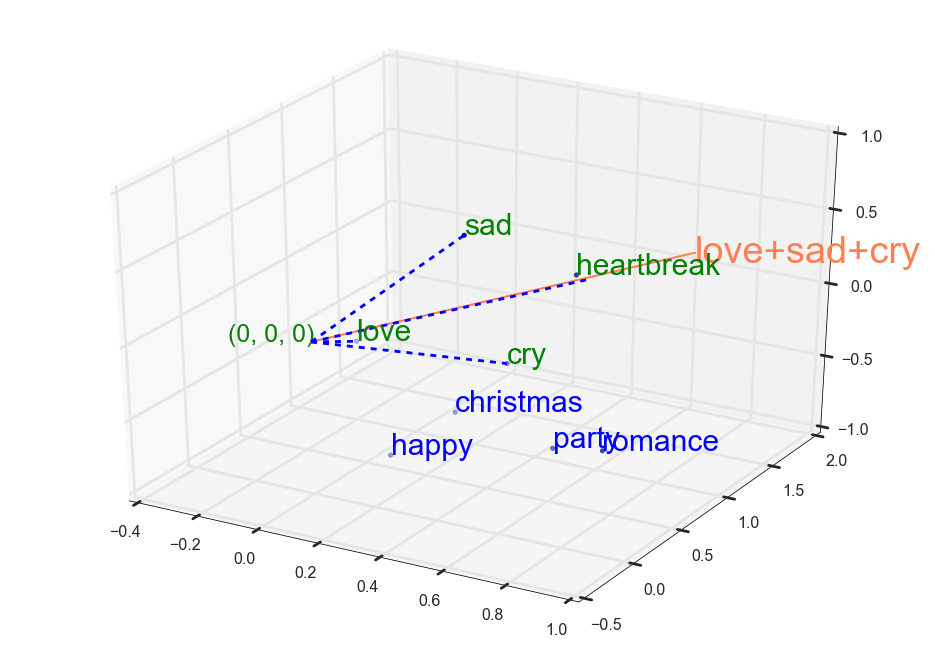

In [389]:
import seaborn as sns
import numpy as np
sns.set_style('whitegrid')
sns.set_context('poster')

words = ['happy', 'sad',
         'party',
         'christmas', 'love', 
         'romance', 'heartbreak', 
         'cry'
        ]
test = modeldf2.ix[words]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test[0], test[1], test[2])
#ax.set_xlim(0, 1)
#ax.set_ylim(0, 1)
#ax.set_zlim(-1, 0)
x1, y1, z1= modeldf2.ix['love']
ax.plot((0, x1), (0, y1), (0, z1), linestyle = '--', c = 'b')
x2, y2, z2= modeldf2.ix['cry']
ax.plot((0, x2), (0, y2), (0, z2), linestyle = '--', c = 'b')
x3, y3, z3= modeldf2.ix['sad']
ax.plot((0, x3), (0, y3), (0, z3), linestyle = '--', c = 'b')
ax.plot((0, x1+x2+x3), (0, y1+y2+y3), (0, z2+z2+z3), linestyle = '-', c = 'coral', linewidth = 2)
x4, y4, z4= modeldf2.ix['heartbreak']
ax.plot((0, x4+0.03), (0, y4), (0, z4-0.02), linestyle = '--', c = 'b')
for i, txt in enumerate(words):
    if txt in ['love', 'cry', 'sad']:
        ax.text(test[0][i],test[1][i], test[2][i],  txt, size=30, 
    zorder=2, color='g')
    elif txt == 'heartbreak':
        ax.text(test[0][i],test[1][i], test[2][i],  txt, size=30, 
    zorder=2, color='g')
    else:
        ax.text(test[0][i],test[1][i], test[2][i],  txt, size=30, 
    zorder=2, color='b')
ax.text(-0.2, -0.2, 0,  '(0, 0, 0)', size=25, 
    zorder=1, color='g')
ax.text(x1+x2+x3,y1+y2+y3, z1+z2+z3,  'love+sad+cry', size=38, 
    zorder=1, color='coral')
    #ax.annotate(txt, (test[0][i],test[1][i], test[2][i]))
plt.show()

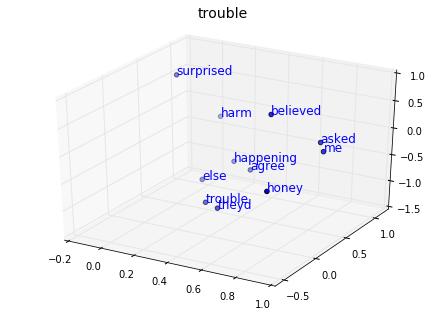

In [65]:
theme = 'trouble'
words = [theme]+[w for w,d in model.most_similar(theme,  topn=10)]
test = modeldf2.ix[words]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test[0], test[1], test[2])

for i, txt in enumerate(words):
    ax.text(test[0][i],test[1][i], test[2][i],  txt, size=12, 
    zorder=1, color='b')

plt.title(theme+'\n', fontsize = 14)
plt.show()

In [318]:
model.cum_table

array([  26979181,   53832958,   79615485, ..., 2147465803, 2147474725,
       2147483647], dtype=uint32)

In [362]:
words

['math',
 u'yknow',
 u'shoulda_learned',
 u'exists',
 u'iheri',
 u'honey_honey',
 u'playa',
 u'invitation',
 u'man_ijoei',
 u'forgiveness_forgiveness',
 u'lack']

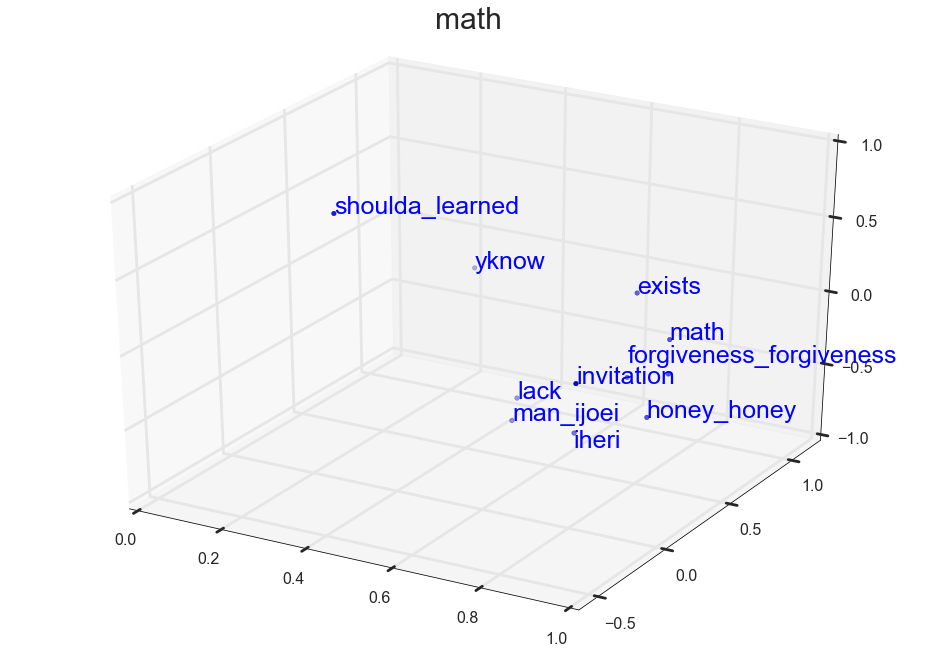

In [366]:
theme = 'math'
words = [theme]+[w for w,d in bmodel.most_similar(theme,  topn=10)]
words = filter(lambda x: x not in stop, words)

test = bmodeldf.ix[words]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test[0], test[1], test[2])
ax.set_xlim(0, 1)

for i, txt in enumerate(words):
    if txt == 'own':
        ax.text(test[0][i],test[1][i], test[2][i]+0.3,  txt, size=25, 
    zorder=1, color='b')
    elif txt == 'paradise':
        ax.text(test[0][i],test[1][i], test[2][i]-0.2,  txt, size=25, 
    zorder=1, color='b')
    elif txt == 'iheri':
        ax.text(test[0][i],test[1][i], test[2][i]-0.1,  txt, size=25, 
    zorder=1, color='b')
    elif txt == 'forgiveness_forgiveness':
        ax.text(test[0][i],test[1][i], test[2][i]+0.1,  txt, size=25, 
    zorder=1, color='b')
    elif txt !='playa':
        ax.text(test[0][i],test[1][i], test[2][i],  txt, size=25, 
    zorder=1, color='b')

plt.title(theme+'\n', fontsize = 30)
plt.show()

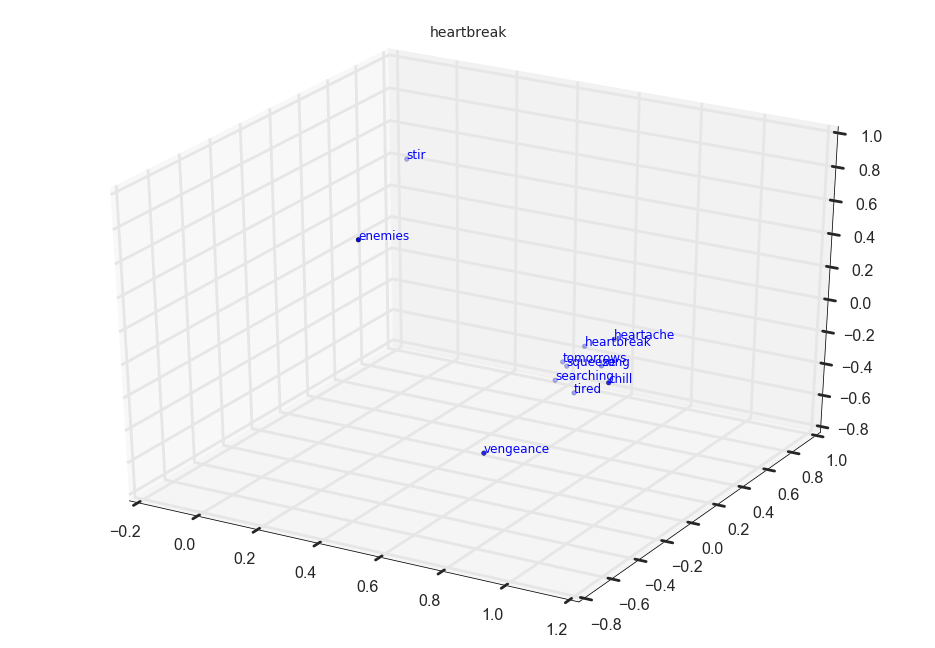

In [291]:
theme = 'heartbreak'
words = [theme]+[w for w,d in model.most_similar(theme,  topn=10)]
test = modeldf.ix[words]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test[0], test[1], test[2])

for i, txt in enumerate(words):
    ax.text(test[0][i],test[1][i], test[2][i],  txt, size=12, 
    zorder=1, color='b')

plt.title(theme+'\n', fontsize = 14)
plt.show()

# Bigram model

We also explored bigram model. Bigrams contain richer content, and covers more common word pairs and phrases which is shown to be important for high quality model construction in Mikolov et al. 2013

In [69]:
bmodel = gensim.models.Word2Vec.load('SpotifyTeam2/bmodel3d')

In [121]:
vocab = list(bmodel.vocab.keys())
print len(vocab)

29267


In [118]:
bmodel.most_similar('sad',  topn=15)

[(u'agree', 0.9999853372573853),
 (u'happening', 0.9997382164001465),
 (u'nobody_else', 0.9996620416641235),
 (u'taught', 0.9995954036712646),
 (u'any', 0.9995174407958984),
 (u'thats', 0.9994727373123169),
 (u'one', 0.9994615912437439),
 (u'wondering', 0.9994597434997559),
 (u'goodbye', 0.999443531036377),
 (u'had', 0.9994385242462158),
 (u'thinking', 0.9994364976882935),
 (u'asking', 0.9994202852249146),
 (u'apologize', 0.999380886554718),
 (u'could_compare', 0.9993391633033752),
 (u'suppose', 0.9992995858192444)]

In [226]:
bmodel.most_similar('math',  topn=15)

[(u'yknow', 0.9999614357948303),
 (u'shoulda_learned', 0.9998931288719177),
 (u'exists', 0.9998389482498169),
 (u'iheri', 0.9998055100440979),
 (u'honey_honey', 0.9997299909591675),
 (u'playa', 0.9996743202209473),
 (u'invitation', 0.99966961145401),
 (u'man_ijoei', 0.9996455311775208),
 (u'forgiveness_forgiveness', 0.9996377825737),
 (u'lack', 0.9994662404060364),
 (u'ruff_stuff', 0.9994051456451416),
 (u'wouldve_known', 0.9993913769721985),
 (u'sposed', 0.999380350112915),
 (u'badmind', 0.9993785619735718),
 (u'proven', 0.9993188381195068)]

In [122]:
bmodeldf = pd.DataFrame(bmodel.syn0norm)
bmodeldf.index = vocab

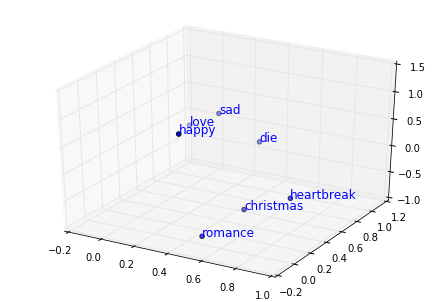

In [77]:
words = ['happy', 'sad', 'christmas', 'love', 'die', 'romance', 'heartbreak']
test = bmodeldf2.ix[words]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test[0], test[1], test[2])

for i, txt in enumerate(words):
    ax.text(test[0][i],test[1][i], test[2][i],  txt, size=12, 
    zorder=1, color='blue')
    #ax.annotate(txt, (test[0][i],test[1][i], test[2][i]))
plt.show()

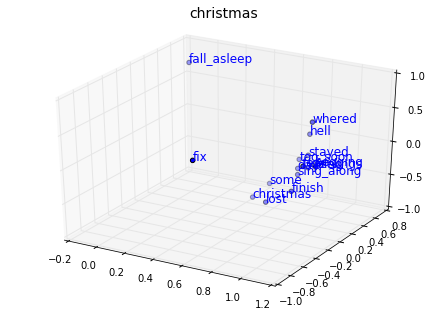

In [130]:
theme = 'christmas'
words = [theme]+[w for w,d in bmodel.most_similar(theme,  topn=15)]
test = bmodeldf.ix[words]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test[0], test[1], test[2])

for i, txt in enumerate(words):
    ax.text(test[0][i],test[1][i], test[2][i],  txt, size=12, 
    zorder=1, color='b')

plt.title(theme+'\n', fontsize = 14)
plt.show()

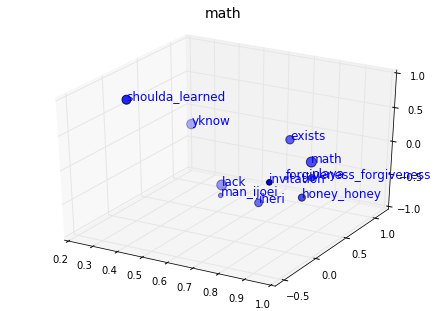

In [165]:
theme = 'math'
words = [theme]+[w for w,d in bmodel.most_similar(theme,  topn=10)]
ds = [d for w, d in bmodel.most_similar(theme,  topn=10)]
test = bmodeldf.ix[words]

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(test[0], test[1], test[2], s = np.arange(10, 0, -1)*10)

for i, txt in enumerate(words):
    ax.text(test[0][i],test[1][i], test[2][i],  txt, size=12, 
    zorder=1, color='b')

plt.title(theme+'\n', fontsize = 14)
plt.show()